# 1. Introdução
Este é um modelo de machine learning usando regressão linear desenvolvido para prever gorjetas de garçons com base em alguns dados dos clientes como valor da conta, sexo, se a pessoa é fumante, horario do dia, refeição e quantidade de pessoas.

# 2. Importando Bibliotecas

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 3. Analisando Estrutura do Dataset

In [181]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/tips.csv')

In [182]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [183]:
df.shape

(244, 7)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [185]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [186]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [187]:
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [188]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [189]:
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [190]:
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['smoker'] = df['smoker'].map({'Yes': 1, 'No': 0})
df['day'] = df['day'].map({'Sat': 1, 'Sun': 2, 'Thur': 3, 'Fri': 4})
df['time'] = df['time'].map({'Dinner': 1, 'Lunch': 0})

# 4. Verificando correlações com a variável alvo

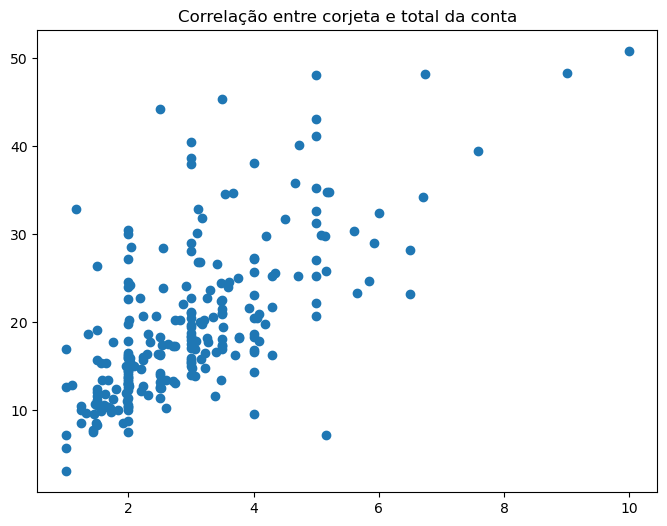

In [191]:
plt.figure(figsize = (8, 6))
plt.scatter(df['tip'], df['total_bill'])
plt.title('Correlação entre corjeta e total da conta')
plt.show()

In [49]:
df.corr()['tip'].sort_values(ascending = False)

tip           1.000000
total_bill    0.675734
size          0.489299
time          0.121629
sex           0.088862
smoker        0.005929
day          -0.073143
Name: tip, dtype: float64

# 5. Aplicando Modelo de Machine Learning

In [278]:
X = np.array(df[['total_bill', 'size', 'time']])
y = np.array(df['tip'])

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [280]:
model = LinearRegression()

In [281]:
model.fit(X_train, y_train)

LinearRegression()

In [282]:
model.score(X_test, y_test)

0.47722376197879457

# 6. Deploy do Modelo

In [283]:
model.predict([[24.50, 1, 2]])

array([2.99493664])

### No nosso caso teste não obtivemos uma acurácia boa, talvez seria necessário mais variáveis para testar uma correlação com as gorjetas